In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'

### Mixture normal distribution PDF

In [3]:
def mnPDF(x, mean1 = 0, sd1 = 1, mean2 = 0, sd2 = 1, p = 1):
    return p * norm.pdf(x, mean1, sd1) + (1 - p) * norm.pdf(x, mean2, sd2)

In [4]:
## Plot PDF
mean1, sd1 =  0.05, 0.3
mean2, sd2 = -0.03, 0.15
p = 0.8

In [5]:
x = np.linspace(-2, 2, 201)
f = mnPDF(x, mean1, sd1, mean2, sd2, p)

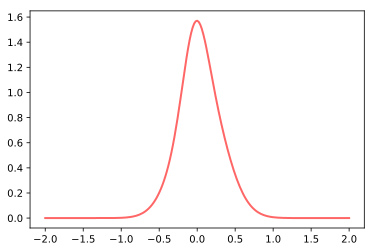

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, f, 'r-', lw=2, alpha=0.6, label='Mixture normal PDF')
plt.show()

### Generate MN random variables

In [7]:
def mnRnd (n, mean1 = 0, sd1 = 1, mean2 = 0, sd2 = 1, p = 1):
    pr = np.random.uniform(size=n)
    X1 = norm.rvs(size=n, loc=mean1, scale=sd1)
    X2 = norm.rvs(size=n, loc=mean2, scale=sd2)
    return (pr < p) * X1 + (pr >= p) * X2

In [8]:
# Histogram
Y = mnRnd(100000, mean1, sd1, mean2, sd2, p)

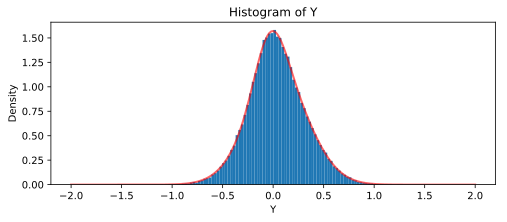

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))
ax.hist(Y, density=True, bins=100)
ax.set_xlabel('Y')
ax.set_ylabel('Density')
ax.set_title('Histogram of Y')
ax.plot(x, f, 'r-', lw=2, alpha=0.6, label='Mixture normal PDF')
plt.show()

### Stock price simulation

In [10]:
m  = 365
dt = 1 / m
S0 = 100
R  = mnRnd(365, mean1 * dt, sd1 * np.sqrt(dt), mean2 * dt, sd2 * np.sqrt(dt), p)

In [11]:
%%time
# method 1 - slower
S = np.zeros(m)
S[0] = S0 * np.exp(R[0])

for i in range(1, m):
    S[i] = S[i-1] * np.exp(R[i])


Wall time: 0 ns


In [12]:
%%time
# method 2 - vectoriation - about 8 times faster
cR = np.cumsum(R)
S  = np.exp(np.log(S0) + cR)


Wall time: 0 ns


In [13]:
#%time cR = np.cumsum(R); S  = np.exp(np.log(S0) + cR)

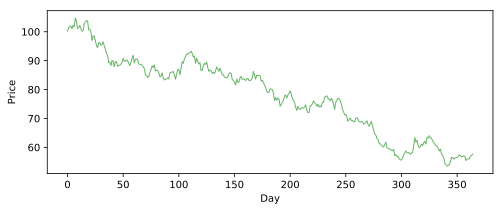

In [14]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(8,3))
ax.plot(S, 'g', lw=1, alpha=0.6)
ax.set_xlabel('Day')
ax.set_ylabel('Price')
plt.show()